# Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

model = RandomForestClassifier(n_estimators=100, random_state=42)
df = pd.read_csv('..\\data\\data.csv')
# Definisco le variabili feature
features = ['degrees','wind_direction', 'concentration', 'Wind Speed', 'azimuth_degrees']
X = df[features]

# Definisco la variabile target
y = df['distance']

# Faccio il Kfold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Inizializzo una lista per memorizzare le predizioni

# cross validation scores
cv_scores = cross_val_score(model, X,y, cv=kf, scoring='accuracy')
# Stampo i risultati
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))


Cross-validation scores: [0.55555556 0.52040816 0.52267574 0.50340136 0.55555556]
Mean cross-validation score: 0.5315192743764172


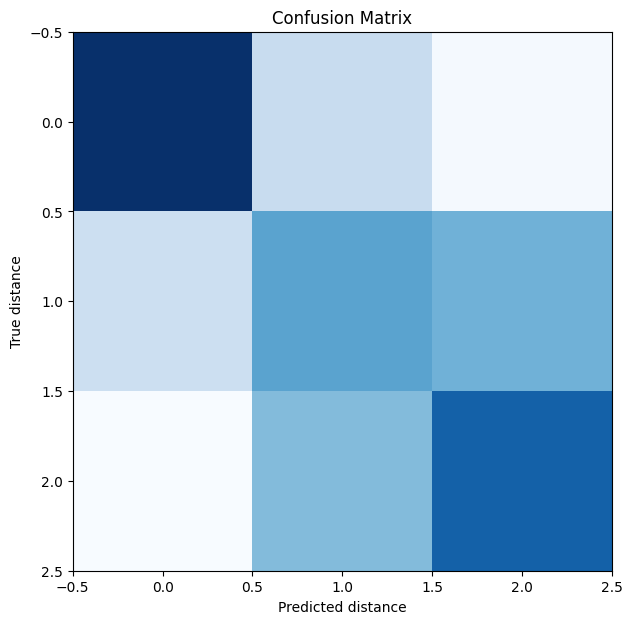

In [14]:

# Corss validation predictions per matrice di confusione
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(model, X, y, cv=kf)
# Stampo la matrice di confusione
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted distance')
plt.ylabel('True distance')
plt.show()

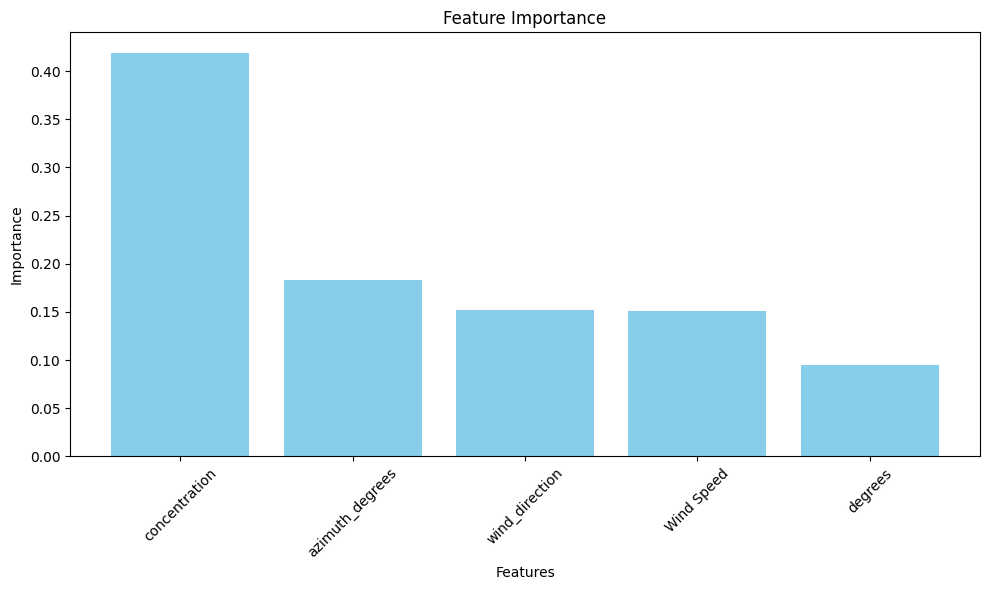

In [15]:
# Alleno il modello
model.fit(X, y)

# Feature importance
importances = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
# Plotto le feature importance
plt.figure(figsize=(10, 6))
plt.bar(importances['Feature'], importances['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Metriche di valutazione
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Classification Report:")
print("Accuracy: {accuracy_score(y, y_pred):.4f}") 

Classification Report:
Accuracy: {accuracy_score(y, y_pred):.4f}


In [8]:
# Predizione su nuovi dati
def predict_distance(degrees, wind_direction, concentration, Wind_Speed, azimuth_degrees):
    new_sample = pd.DataFrame([[degrees, wind_direction, concentration, Wind_Speed, azimuth_degrees]], columns=features)
    prediction = model.predict(new_sample)[0]
    probabilities = model.predict_proba(new_sample)[0]
    print(f"Predicted distance: {prediction} metri")
    print(f"Probabilities per classe:")
    for i, prob in enumerate(probabilities):
        print(f"Classe {i} m: {prob:.2f}")
    return prediction

In [11]:
# Esempio di predizione
predict_distance(degrees=30, wind_direction=45, concentration=10, Wind_Speed=10, azimuth_degrees=60)


Predicted distance: 50 metri
Probabilities per classe:
Classe 0 m: 0.62
Classe 1 m: 0.22
Classe 2 m: 0.16


np.int64(50)